# Voter System Proposal Simulation

Joshua Sanz, Robert Wang, Victor Han

In [96]:
# a bit of setup
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import scipy.stats as stats


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
from VoterModel import VoterModel

In [98]:
plt.rcParams['figure.figsize'] = 12, 8

In [99]:
er = nx.erdos_renyi_graph(50, 0.15)

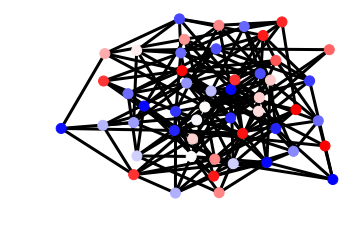

In [100]:
options = {
    'node_color': np.random.rand(50),
    'node_size': 100,
    'width': 3,
    'cmap': 'bwr'
}
plt.subplot(221)
nx.draw(er, **options)

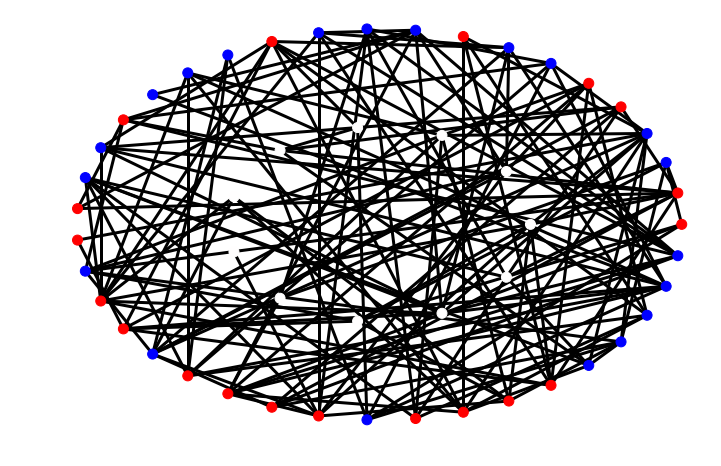

In [110]:
vm = VoterModel(voting='simple', visualization='shell')
vm.initialize('all_rand')
vm.draw()

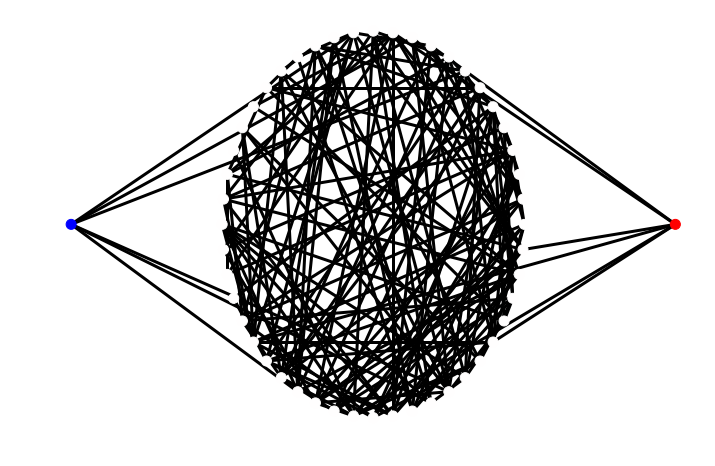

In [111]:
vm.initialize('rand_pair')
vm.draw()

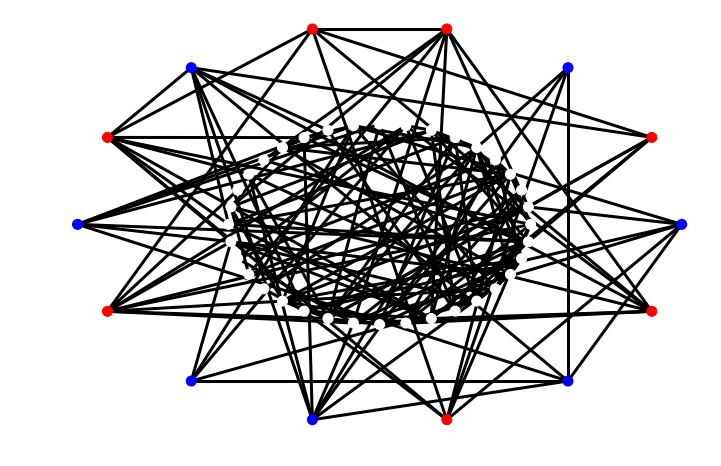

In [112]:
vm.update()
vm.draw()

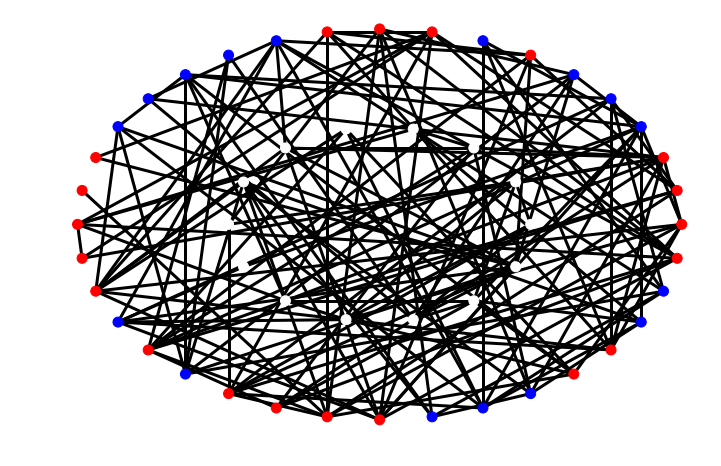

In [113]:
vm.update()
vm.draw()

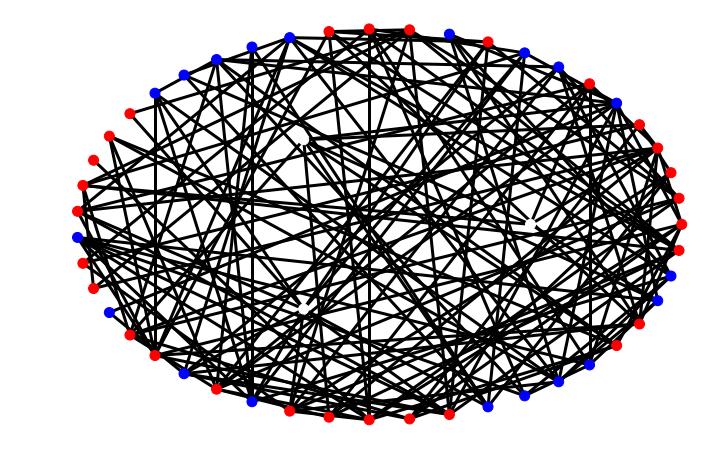

In [114]:
vm.update()
vm.draw()